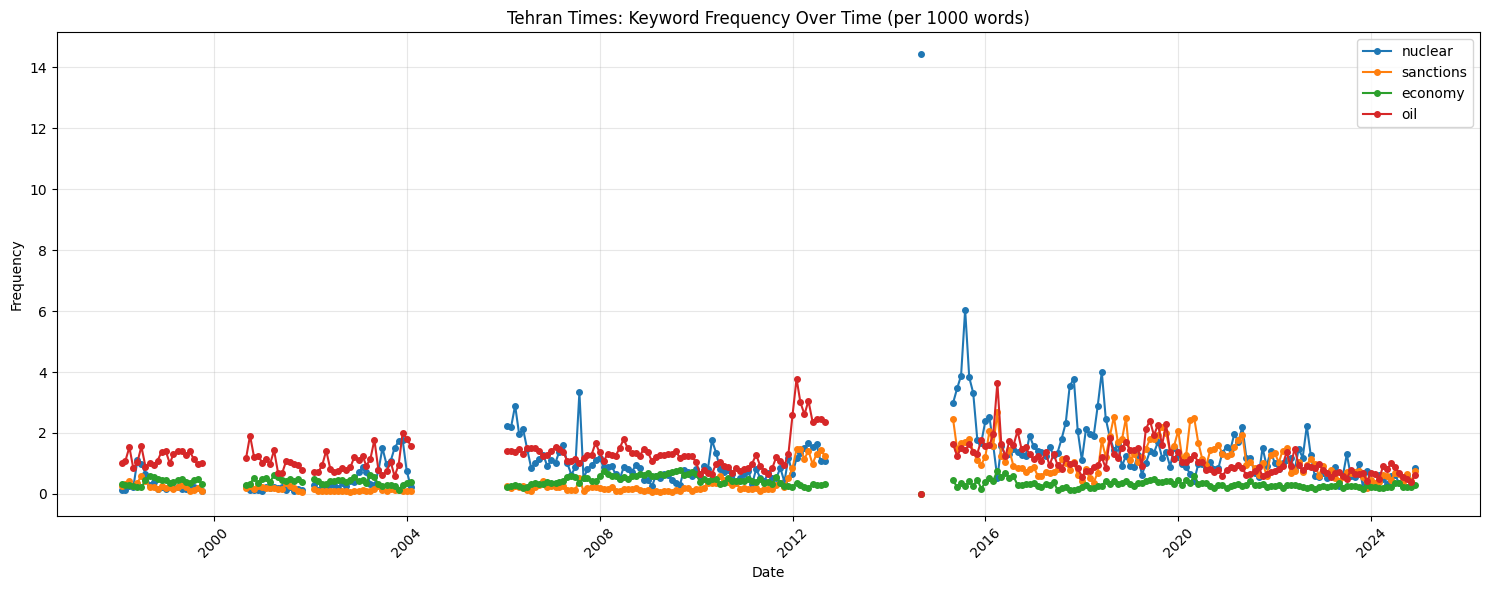

In [2]:
"""Keyword frequency analysis over time"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_keywords(df, keywords, time_group='ME'):
    """Analyze keyword frequency over time."""
    df['date'] = pd.to_datetime(df['published_date'])
    
    # Calculate base word count
    df['total_words'] = df['body'].str.count(r'\w+')
    word_counts = df.groupby(pd.Grouper(key='date', freq=time_group))['total_words'].sum()
    
    # Calculate keyword frequencies
    results = {}
    for keyword in keywords:
        df[f'kw_{keyword}'] = df['body'].str.count(keyword)
        kw_counts = df.groupby(pd.Grouper(key='date', freq=time_group))[f'kw_{keyword}'].sum()
        results[keyword] = (kw_counts / word_counts) * 1000
    
    return results

# Load data
df = pd.read_csv("../data/processed/articles.csv", sep=';')

# Example keywords
keywords = ['nuclear', 'sanctions', 'economy', 'oil']
frequencies = analyze_keywords(df, keywords)

# Plot results
plt.figure(figsize=(15, 6))
for keyword, freq in frequencies.items():
    plt.plot(freq.index, freq.values, label=keyword, marker='o', markersize=4)

plt.title('Tehran Times: Keyword Frequency Over Time (per 1000 words)')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()